In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
parking = pd.read_excel('./Resources/parking.xls')
parking

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED
...,...,...,...,...,...,...
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED


In [9]:
parking.shape

(9060, 6)

In [10]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [11]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


In [12]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9060 entries, 0 to 9059
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Bldg City             9060 non-null   object
 1   Bldg State            9060 non-null   object
 2   Bldg Status           9060 non-null   object
 3   Property Type         9060 non-null   object
 4   Total Parking Spaces  9060 non-null   int64 
 5   Owned/Leased          9060 non-null   object
dtypes: int64(1), object(5)
memory usage: 424.8+ KB


In [38]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [39]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [40]:
parking['Bldg State'].value_counts()

TX    886
CA    746
DC    486
VA    440
FL    413
MD    403
NY    367
PA    245
CO    242
WA    242
IL    241
MI    235
AZ    222
GA    218
NC    212
MO    209
OH    201
IN    157
TN    152
MT    150
LA    149
NJ    146
KY    137
NM    136
OK    130
MA    127
AL    124
WI    122
WV    106
OR    105
MN     98
ME     97
UT     96
SC     95
MS     87
AR     83
ND     80
VT     75
NV     75
IA     74
KS     74
SD     66
ID     63
CT     58
NE     51
WY     45
NH     39
DE     28
RI     27
Name: Bldg State, dtype: int64

In [42]:
parking['Bldg City'].value_counts()

WASHINGTON     487
EL PASO         89
LAREDO          81
LAKEWOOD        79
SPRINGFIELD     79
              ... 
SIDNEY           1
GYPSUM           1
CRUM LYNNE       1
STUART           1
BRIDGETON        1
Name: Bldg City, Length: 1900, dtype: int64

In [47]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

#### 1. What is the distribution or values for owned/leased

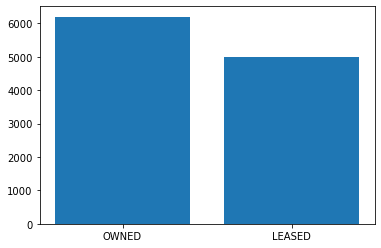

In [49]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])
plt.show()

In [53]:
owned_leased = pd.pivot_table(parking,index='Owned/Leased', values='Total Parking Spaces',aggfunc='sum')

In [54]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,310269
OWNED,158210


<AxesSubplot:xlabel='Owned/Leased'>

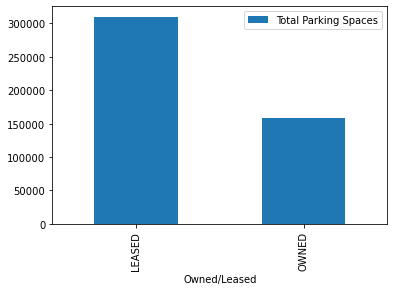

In [56]:
owned_leased.plot(kind='bar')

<BarContainer object of 2 artists>

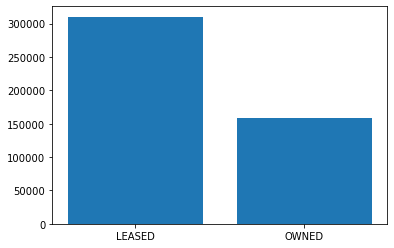

In [58]:
plt.bar(owned_leased.index, owned_leased['Total Parking Spaces'])

#### 2.In Which building state parking situation is in excess - put it in an order

In [59]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [60]:
excess_parking = pd.pivot_table(parking, index='Bldg State', columns='Bldg Status', values='Total Parking Spaces')

In [61]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [64]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [65]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


<AxesSubplot:xlabel='Bldg State'>

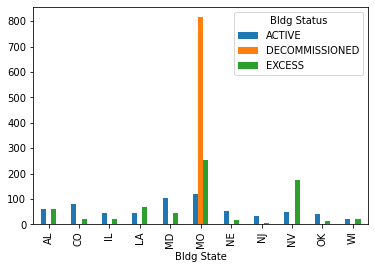

In [72]:
excess_parking.plot(kind='bar')

<BarContainer object of 11 artists>

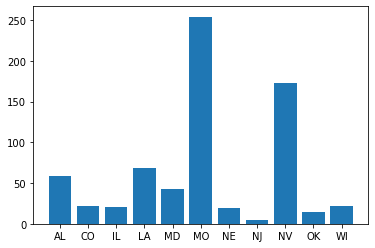

In [74]:
plt.bar(excess_parking.index, excess_parking.EXCESS)

In [80]:
excess_parking_sorted = excess_parking.EXCESS.sort_values(ascending=False)

In [81]:
excess_parking_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

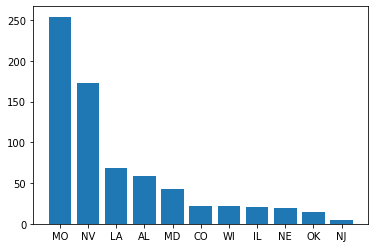

In [82]:
plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)

#### 3.Bldg cities that have been decomissioned along with total parking

In [83]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [86]:
decom_parking_city = parking[parking['Bldg Status'] == 'DECOMMISSIONED']

In [87]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
429,PORTHILL,ID,DECOMMISSIONED,BUILDING,0,OWNED
1933,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
1934,MOOERS,NY,DECOMMISSIONED,BUILDING,0,OWNED
2338,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
2348,CURTIS BAY,MD,DECOMMISSIONED,BUILDING,0,OWNED
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED
5726,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,0,OWNED
6752,FORT WORTH,TX,DECOMMISSIONED,BUILDING,0,OWNED


In [88]:
decom_parking_city = decom_parking_city[decom_parking_city['Total Parking Spaces'] > 0]

In [89]:
decom_parking_city

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
5716,OVERLAND,MO,DECOMMISSIONED,BUILDING,2089,OWNED
5725,SAINT LOUIS,MO,DECOMMISSIONED,BUILDING,357,OWNED


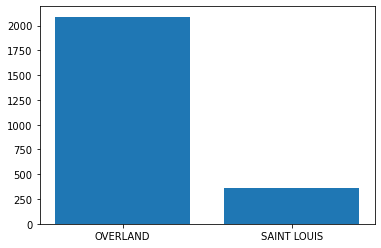

In [91]:
plt.bar(decom_parking_city['Bldg City'],decom_parking_city['Total Parking Spaces'])
plt.show()

#### 4.In Which type of property parking space is in excess

In [92]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [93]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

In [94]:
excess_parking_property = pd.pivot_table(parking[parking['Bldg Status'] == 'EXCESS'], index='Property Type', values='Total Parking Spaces')

In [95]:
excess_parking_property

,Total Parking Spaces
Property Type,
BUILDING,57.791045
STRUCTURE,37.000000


#### 5.Where is more active parking - owned/leased

In [96]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [97]:
active_parking = pd.pivot_table(parking[parking['Bldg Status'] == 'ACTIVE'], index='Owned/Leased', values='Total Parking Spaces')

In [98]:
active_parking

,Total Parking Spaces
Owned/Leased,
LEASED,44.707349
OWNED,74.365997


In [99]:
active_parking.sum()

Total Parking Spaces    119.073346
dtype: float64

In [100]:
active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum()

Owned/Leased
LEASED    0.375461
OWNED     0.624539
Name: Total Parking Spaces, dtype: float64

In [104]:
active_parking['Contribution'] = (active_parking['Total Parking Spaces'] / active_parking['Total Parking Spaces'].sum())*100

In [105]:
active_parking

,Total Parking Spaces,Contribution
Owned/Leased,,
LEASED,44.707349,37.546059
OWNED,74.365997,62.453941


#### States with more leased parking

In [106]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [110]:
state_leased_parking = pd.pivot_table(parking[parking['Owned/Leased'] =='LEASED'], index='Bldg State', values='Total Parking Spaces')

In [111]:
state_leased_parking

,Total Parking Spaces
Bldg State,
AL,64.055556
AR,28.098592
AZ,38.025806
CA,44.639810
CO,58.647727
CT,26.134615
DC,42.562914
DE,15.592593
FL,49.102828


In [116]:
state_leased_parking_sorted = state_leased_parking.sort_values('Total Parking Spaces',ascending=False)

In [117]:
state_leased_parking_sorted

,Total Parking Spaces
Bldg State,
MO,107.762821
TX,73.457086
VA,72.476316
AL,64.055556
UT,62.505882
GA,62.425414
CO,58.647727
VT,56.128205
NM,51.926316


#### 7.Which Property type has more active parking

#### 8.How is the distribution of parking in the city by property type

#### 9.Building States which  has 0 parking Spaces

#### 10.What are those states which has minimum and Maximum parking space ?